In [2]:
import numpy as np
from ase.eos import EquationOfState as EOS
from ase.calculators.vasp import Vasp
import matplotlib.pyplot as plt
from ase.build import bulk
from ase.visualize import view
from ase.io import read,write


In [ ]:
#generate an array of 7 points 10% around 3.89 angstroms
A = np.linspace(3.89 * 0.9, 3.89 * 1.1, 7)

energies = []
volumes = []
ready = True

for a in A:
    Pd_cubic = bulk('Pd', 'fcc', a = a, cubic = True)
    #print(Pd_cubic)
    
    calc = Vasp(
            directory = './EOS/Pd-a-{0:1.2f}'.format(a),
            xc = 'pbe',
            encut = 400,
            ismear = 1, #use MP smearing
            kpts = [8,8,8],
            atoms = Pd_cubic
    )
    
    calc.calculate()
    #calc.read()
    #Pd_cubic = calc.get_atoms()
    energies.append(Pd_cubic.get_potential_energy())
    volumes.append(Pd_cubic.get_volume())
    
if None in energies:
    ready  = False
    
if ready:
    plt.plot(A, energies, 'bo-')
    plt.xlabel('Lattice constant ($\AA$)')
    plt.ylabel('Total energy (eV)')
    plt.savefig('./Pd-fcc-lattice.png')
    plt.show()

In [ ]:
def Calc_Encut(direct, en, atom):
    calc = Vasp(
            directory = direct,
            encut = en, #planewave cutoff
            xc = 'PBE',
            atoms = atom,
            ismear = 1,
            kpts = [8,8,8],
            )

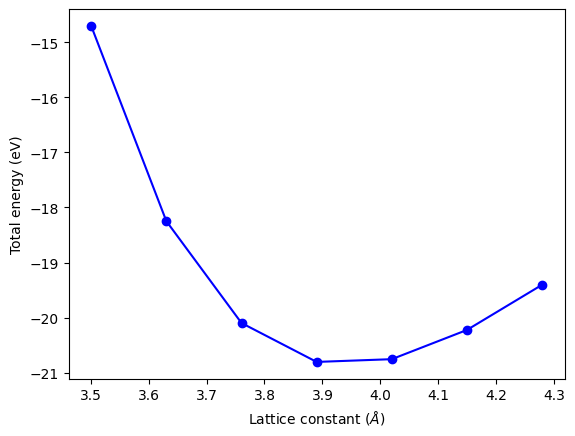

In [8]:
#generate an array of 7 points 10% around 3.89 angstroms
A = np.linspace(3.89 * 0.9, 3.89 * 1.1, 7)

energies = []
volumes = []
ready = True

for a in A:
    Pd_cubic = bulk('Pd', 'fcc', a = a, cubic = True)
    #print(Pd_cubic)
    
    calc = Vasp(
            directory = './EOS/Pd-a-{0:1.2f}'.format(a),
            xc = 'pbe',
            encut = 400,
            ismear = 1, #use MP smearing
            kpts = [8,8,8],
            atoms = Pd_cubic,
        )
    print(calc)
    
    calc.calculate(Pd_cubic)
    calc.read() #why do i need this?
    
    energies.append(calc.get_potential_energy())
    volumes.append(Pd_cubic.get_volume())
    
if None in energies:
    ready  = False
    
if ready:
    plt.plot(A, energies, 'bo-')
    plt.xlabel('Lattice constant ($\AA$)')
    plt.ylabel('Total energy (eV)')
    plt.savefig('./Pd-fcc-lattice.png')
    plt.show()